## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [109]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [110]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [111]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [112]:
#Creating list of columns 
col_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

#Using for-loop to replace any 0 values in each column in list with NaN
for col in col_list:
    diabetes_data[col].replace(0, np.nan, inplace = True)

In [113]:
#Checking presence of NaN values in columns where 0's were replaced by NaN
nan_df=pd.DataFrame(diabetes_data.isnull().sum().sort_values(ascending=False)).reset_index()
nan_df.columns = ['VarName', 'NaN_Count']
nan_df[(nan_df['NaN_Count']>0)]

,VarName,NaN_Count
0,Insulin,374
1,SkinThickness,227
2,BloodPressure,35
3,BMI,11
4,Glucose,5


In [114]:
#Re-checking number of non-null values in each column of diabetes_data after change
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


**<font color='teal'> Plot histograms of each column. </font>**

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

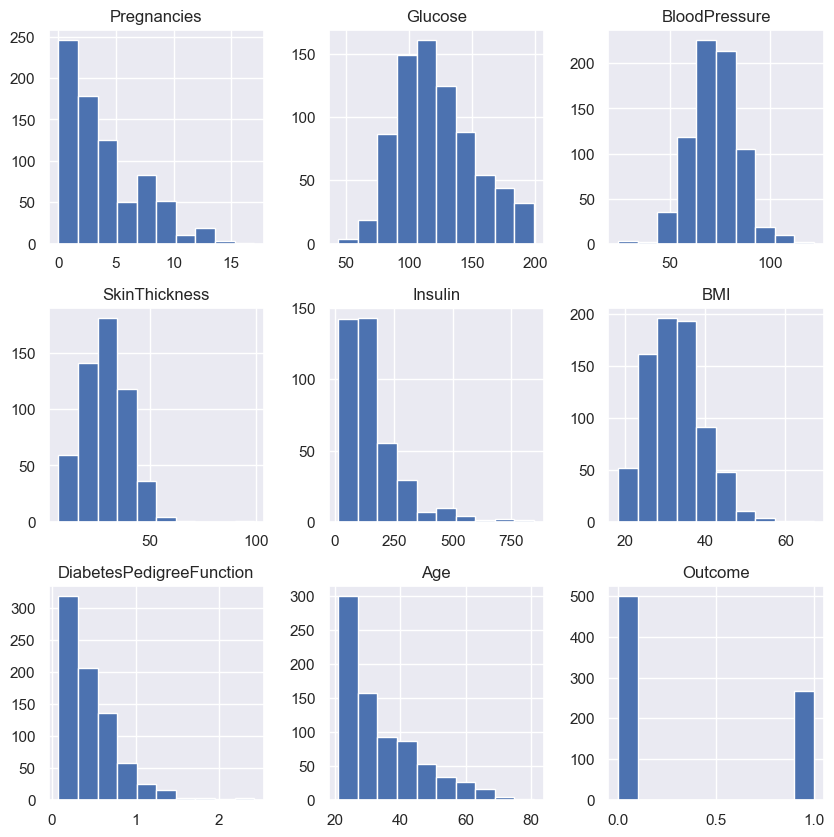

In [115]:
#Specifying subplot display as 3x3 and adjusting figure size
fig, axis = plt.subplots(3, 3, figsize=(10,10))

#Plotting histogram per column of diabetes_data
diabetes_data.hist(ax=axis)

#### Replace the zeros with mean and median values.

In [116]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

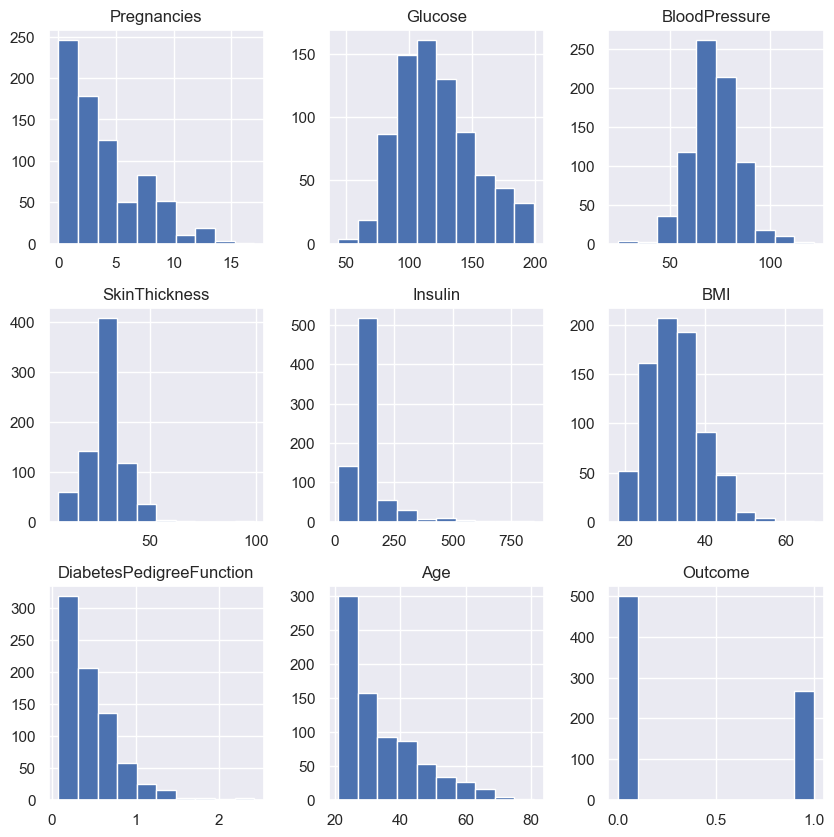

In [117]:
#Specifying subplot display as 3x3 and adjusting figure size
fig, axis = plt.subplots(3, 3, figsize=(10,10))

#Plotting histogram per column of diabetes_data
diabetes_data.hist(ax=axis)

#### Plot the correlation matrix heatmap

Correlation between various features


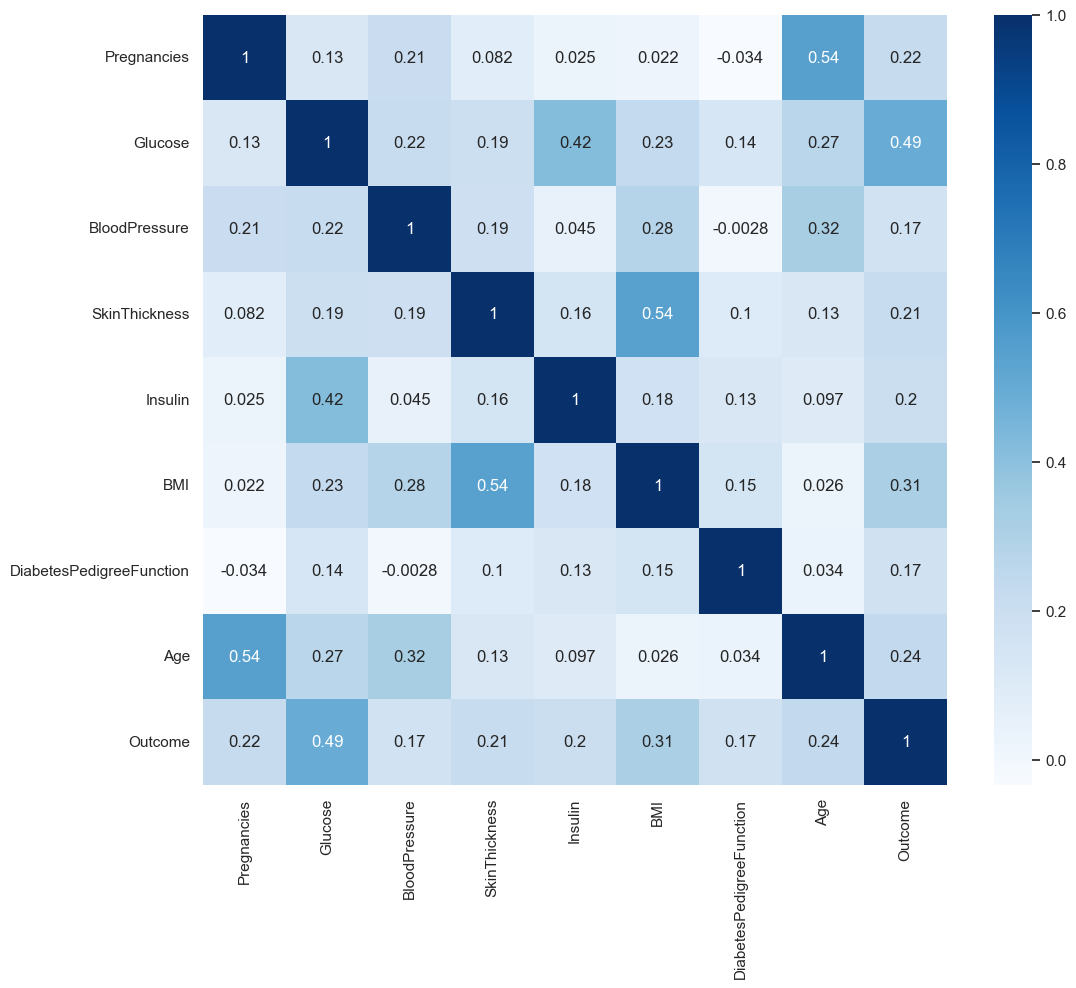

In [118]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [119]:
#Defining y as 'Outcome' column of diabetes_data
y = diabetes_data[['Outcome']]

y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


**<font color='teal'> Create a 70/30 train and test split. </font>**

In [120]:
#Defining X as remainder of diabetes_data (i.e. excluding 'Outcome' variable)
X = diabetes_data.drop(columns = 'Outcome')

X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [121]:
#Importing train_test_split() from sklearn
from sklearn.model_selection import train_test_split

#Creating 70/30 train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [122]:
#Importing StandardScaler() from sklearn
from sklearn.preprocessing import StandardScaler

#Define scaler using StandardScaler()
scaler = StandardScaler()

#Use scaler to fit_transform() X_train data
X_train = scaler.fit_transform(X_train)

#Use scaler to transform() X_test data
#Note only transform() X_test data to avoid data leakage
X_test = scaler.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [123]:
#Added to suppress warning message when running KNNeighborsClassifer
import warnings
warnings.filterwarnings('ignore')

#Runing KNearestNeighbor classfier
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [124]:
#Inspect train_scores list
print(train_scores)

[1.0, 0.8361266294227188, 0.819366852886406, 0.8044692737430168, 0.8100558659217877, 0.8007448789571695, 0.7988826815642458, 0.7951582867783985, 0.7839851024208566]


In [125]:
#Print train_scores generated for each nearest-neighbor value using for-loop
for i in range(1,10):
     print('The mean accuracy score for', i, 'nearest neighbors using the training data is:', train_scores[i-1])

The mean accuracy score for 1 nearest neighbors using the training data is: 1.0
The mean accuracy score for 2 nearest neighbors using the training data is: 0.8361266294227188
The mean accuracy score for 3 nearest neighbors using the training data is: 0.819366852886406
The mean accuracy score for 4 nearest neighbors using the training data is: 0.8044692737430168
The mean accuracy score for 5 nearest neighbors using the training data is: 0.8100558659217877
The mean accuracy score for 6 nearest neighbors using the training data is: 0.8007448789571695
The mean accuracy score for 7 nearest neighbors using the training data is: 0.7988826815642458
The mean accuracy score for 8 nearest neighbors using the training data is: 0.7951582867783985
The mean accuracy score for 9 nearest neighbors using the training data is: 0.7839851024208566


In [126]:
#Inspect test_scores list
print(test_scores)

[0.7316017316017316, 0.7359307359307359, 0.7748917748917749, 0.7575757575757576, 0.7878787878787878, 0.7619047619047619, 0.7792207792207793, 0.7575757575757576, 0.7705627705627706]


In [127]:
#Print test_scores generated for each nearest-neighbor value using for-loop
for i in range(1,10):
     print('The mean accuracy score for', i, 'nearest neighbors using the testing data is:', test_scores[i-1])

The mean accuracy score for 1 nearest neighbors using the testing data is: 0.7316017316017316
The mean accuracy score for 2 nearest neighbors using the testing data is: 0.7359307359307359
The mean accuracy score for 3 nearest neighbors using the testing data is: 0.7748917748917749
The mean accuracy score for 4 nearest neighbors using the testing data is: 0.7575757575757576
The mean accuracy score for 5 nearest neighbors using the testing data is: 0.7878787878787878
The mean accuracy score for 6 nearest neighbors using the testing data is: 0.7619047619047619
The mean accuracy score for 7 nearest neighbors using the testing data is: 0.7792207792207793
The mean accuracy score for 8 nearest neighbors using the testing data is: 0.7575757575757576
The mean accuracy score for 9 nearest neighbors using the testing data is: 0.7705627705627706


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [128]:
#Number of neighbors that resulted in max score in training dataset is equal to 1 + index of max value in train_scores array
print('The number of neighbors that resulted in max score in training dataset is:', 1 + (train_scores.index(max(train_scores))))

The number of neighbors that resulted in max score in training dataset is: 1


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [129]:
#Number of neighbors that resulted in max score in testing dataset is equal to 1 + index of max value in test_scores array
print('The number of neighbors that resulted in max score in testing dataset is:', 1 + (test_scores.index(max(test_scores))))

The number of neighbors that resulted in max score in testing dataset is: 5


Plot the train and test model performance by number of neighbors.

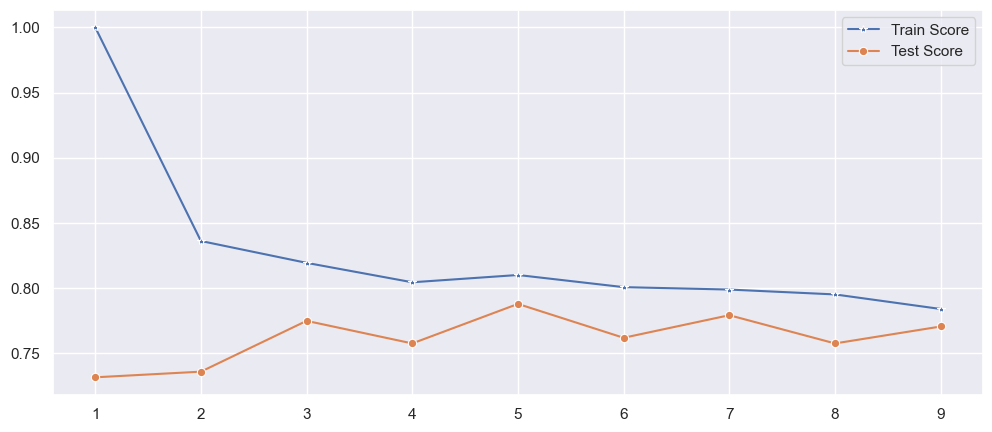

In [130]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [131]:
#Best accuracy score achieve on test data when using nearest neighbors = 5
#Define knn_best model when n =5
knn_best = KNeighborsClassifier(5)

#Fit knn_best model on X_train & y_train
knn_best.fit(X_train,y_train)

#Generate training score for knn_best model using nearest neighbors = 5
train_score_knn_best = knn_best.score(X_train,y_train)
print('The training score when using KNN with 5 nearest neighbors is', train_score_knn_best)

#Generate testing score knn_best model using nearest neighbors = 5
test_score_knn_best = knn_best.score(X_test,y_test)
print('The testing score when using KNN with 5 nearest neighbors is', test_score_knn_best)

The training score when using KNN with 5 nearest neighbors is 0.8100558659217877
The testing score when using KNN with 5 nearest neighbors is 0.7878787878787878


In [132]:
from sklearn.metrics import confusion_matrix
y_pred = knn_best.predict(X_test)
pl = confusion_matrix(y_test,y_pred)
pl

array([[129,  17],
       [ 32,  53]], dtype=int64)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

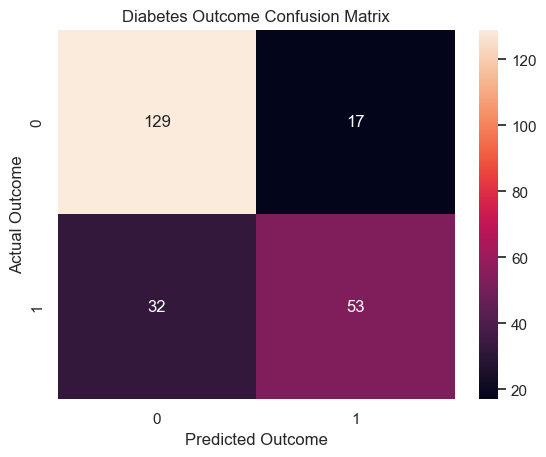

In [133]:
#Create confusion matrix using seaborn, annot displays number of each outcome on matrix & fmt formats outcome numbers displayed
ax = sns.heatmap(pl, annot = True, fmt=".0f")

#Set x-label
ax.set_xlabel('Predicted Outcome')

#Set y-label
ax.set_ylabel('Actual Outcome')

#Set title of confusion matrix
plt.title('Diabetes Outcome Confusion Matrix')

#Save confusion matrix image to .png file
plt.savefig('confusion_matrix.png')

**<font color='teal'> Print the classification report </font>**

In [134]:
#Import classification_report() function
from sklearn.metrics import classification_report

#Print classification report for y_test vs y_pred
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       146
           1       0.76      0.62      0.68        85

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [135]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [136]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 31 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [137]:
#Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Define param_grid, range of values to test for n_estimators parameter of RandomForestClassifier
param_grid = {'n_estimators':np.arange(1,50)}

#Define model as RandomForestClassifier()
model = RandomForestClassifier()

#Use GridSearchCV (already imported above) to search for optimum n_estimator term to use with RandomForestClassifier()
#Cross-validation with 5-folds is used to score each possible value of n_estimators tested
model_cv= GridSearchCV(model,param_grid,cv=5)

#Complete GridSearch for n_estimators as defined above using X,y data
model_cv.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [139]:
print("Best Score with RandomForestClassifier:" + str(model_cv.best_score_))
print("Best Parameters with RandomForestClassifier: " + str(model_cv.best_params_))

Best Score with RandomForestClassifier:0.7735081911552498
Best Parameters with RandomForestClassifier: {'n_estimators': 16}
